In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 

In [2]:
path = r"C:\Users\sidha\Desktop\Tarran\temp\adult dataset\adult.data"

In [3]:
df = pd.read_csv(path,header = None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   'income']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info

<bound method DataFrame.info of        age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   

In [5]:
def convert(string):
    if string == ' <=50K':
        return 0
    else:
        return 1

In [6]:
df['income'] = df['income'].apply(convert)

In [7]:
df['income'].unique()

array([0, 1], dtype=int64)

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
df = df.drop(['education'], axis=1) # redundant due to presence of education-num column
df = pd.get_dummies(df) # categorical varialbes are given numeric values 

In [10]:
df.shape

(32561, 93)

In [11]:
X = df.drop(['income'],axis=1)
y = df['income']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=4
)

In [13]:
model_bayes = GaussianNB()

In [14]:
model_bayes.fit(x_train,y_train)

GaussianNB()

In [16]:
y_pred = model_bayes.predict(x_test)

<AxesSubplot:>

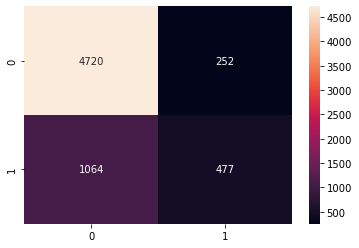

In [17]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [18]:
print("Accuracy:{}\nPrecision:{}\nRecall:{}\nF1 Score: {}".format(accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),
                                                   recall_score(y_test,y_pred),
                                                   f1_score(y_test,y_pred)))

Accuracy:0.7979425763856901
Precision:0.654320987654321
Recall:0.30953926022063594
F1 Score: 0.4202643171806167


In [20]:
model_tree = DecisionTreeClassifier(criterion='entropy') # decision tree using ID3 algo

In [21]:
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
y_pred_tree = model_tree.predict(x_test)

<AxesSubplot:>

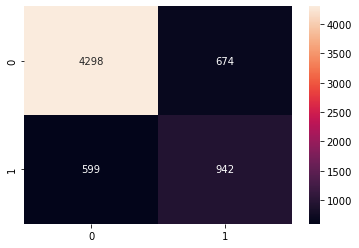

In [23]:
cm_tree = confusion_matrix(y_test,y_pred_tree)
sns.heatmap(cm_tree, annot=True,fmt='d')

In [25]:
print("Accuracy:{}\nPrecision:{}\nRecall:{}\nF1 Score: {}".format(accuracy_score(y_test,y_pred_tree),
                                                                  precision_score(y_test,y_pred_tree),
                                                   recall_score(y_test,y_pred_tree),
                                                   f1_score(y_test,y_pred_tree)))

Accuracy:0.804544756640565
Precision:0.5829207920792079
Recall:0.6112913692407528
F1 Score: 0.5967690845739626
